# Titanic Survival Predictions
the aim of this project was to build models to make predictions on the survival for the titanic data set. Models were created, tuned then combed in ensembles. The hard-voting ensemble classifier made the best predictions in the final test submission (0.79186) reaching the top 8% on the Kaggle leader board. 
 
|   |                        | Final Test Score |
|---|------------------------|------------------|
| 1 | Hard Voting Classifier | 0.79186          |
| 2 | Soft Voting Classifier | 0.78229          |
| 3 | Stacking Classifier    | 0.76555          |

The following steps were undertaken 

1. Understading the Data
2. Feature Engineering
3. Preparing Data
4. Model Building
5. Tune Models
6. Combining Models in Ensembles
7. Test Model
a. Build Test Set 
b. Run Tests and Make Submissions 


In [39]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [40]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


-------------------
# 1.Understading the Data

In [41]:
titanic.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
#It looks like there are quite a few missing values for age and cabin and a couple for embraked.
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
#Look at categorical and numerical features separately 
cat_features = titanic[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
num_features = titanic[['Age', 'SibSp', 'Parch', 'Fare']]

array([[&lt;AxesSubplot:title={&#39;center&#39;:&#39;Age&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;SibSp&#39;}&gt;],
       [&lt;AxesSubplot:title={&#39;center&#39;:&#39;Parch&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;Fare&#39;}&gt;]], dtype=object)

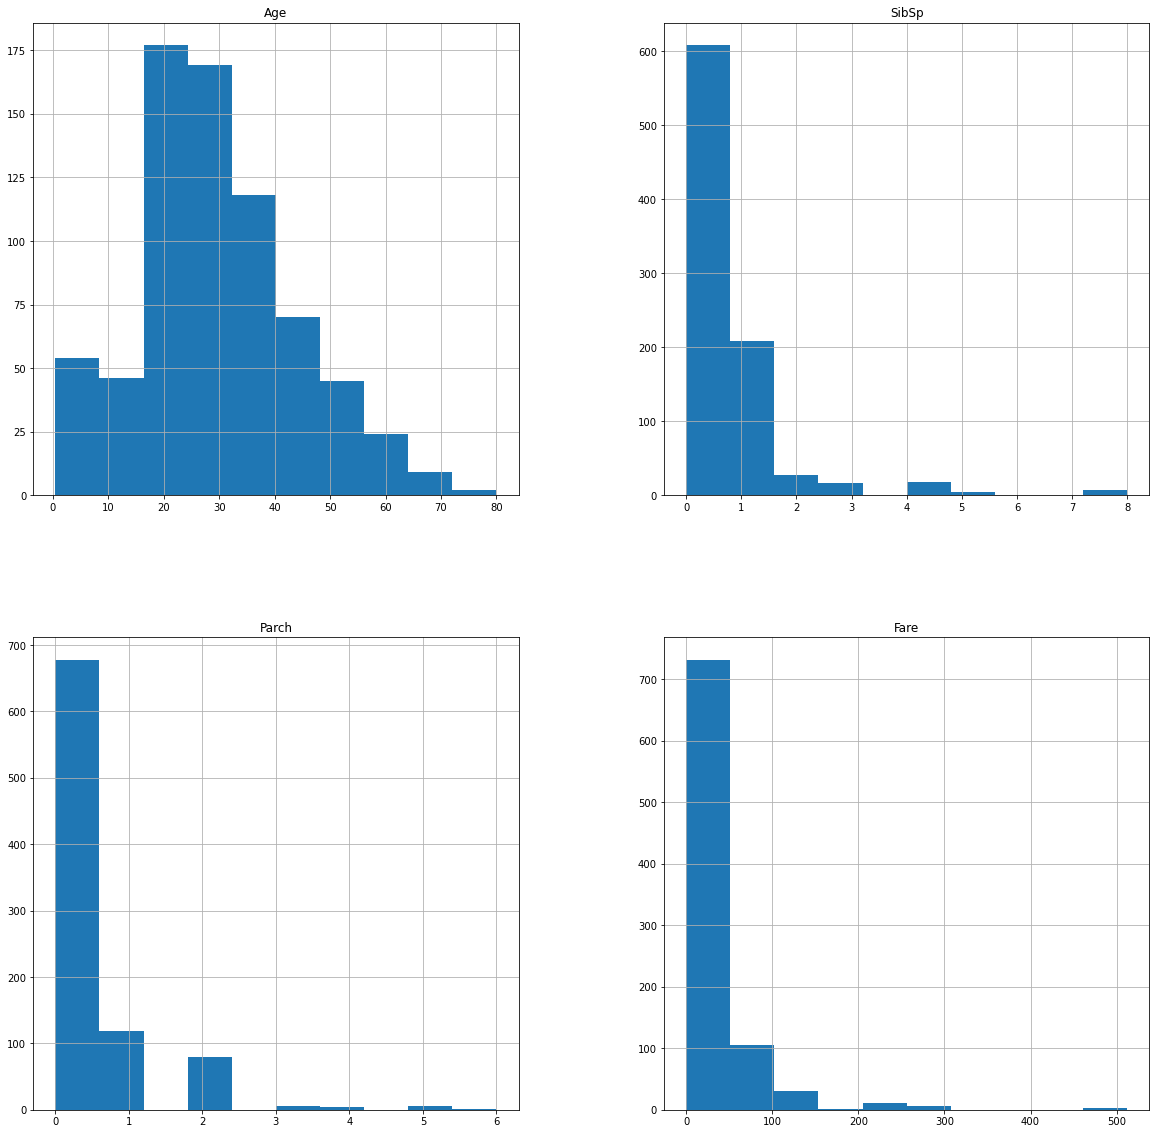

In [44]:
# Look at distribution of num
num_features.hist(figsize=(20,20))

In [45]:
#A lot of non-normal distributions that will need normalising. 
#Num features against the target 
pd.pivot_table(titanic, index='Survived', values=num_features)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [46]:
num_features.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


No large correlations. Largest is between parents/children and siblings/spouse. May be indicative of large families.

In [81]:
#Now for cat features

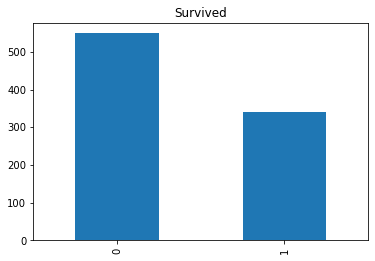

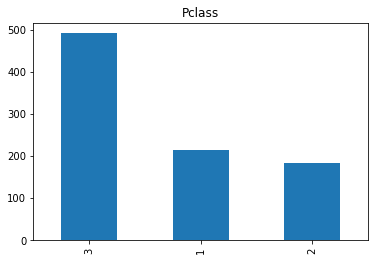

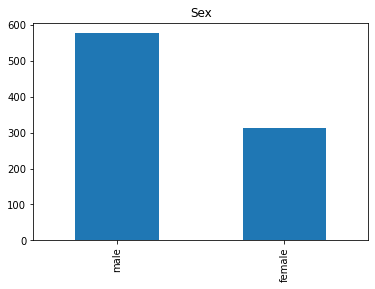

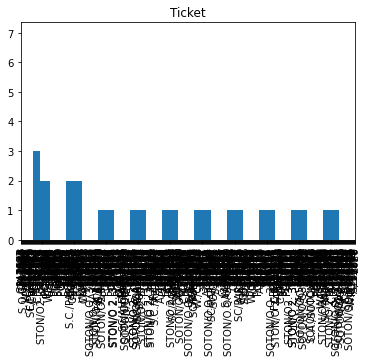

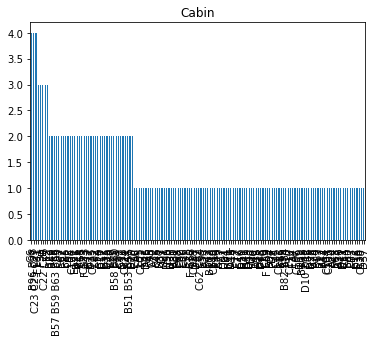

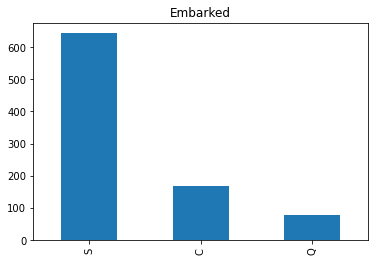

In [84]:
for cat in cat_features:
    titanic[cat].value_counts().plot.bar()
    plt.title(cat)
    plt.show()

More people survived than not. There are more third class and male passengers and majority left from Southampton.

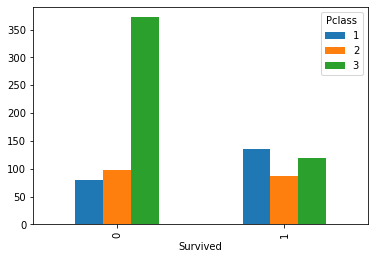

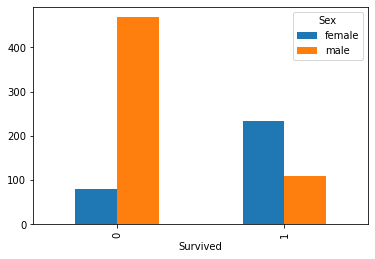

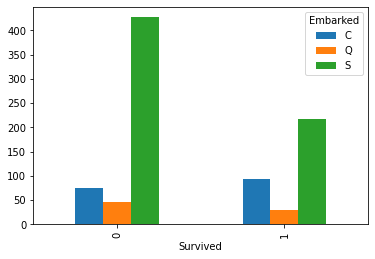

In [49]:
# Cat against target
for cat in ['Pclass', 'Sex', 'Embarked']:
    pd.pivot_table(titanic, index='Survived', columns=titanic[cat], values='Ticket',aggfunc='count').plot(kind='bar')

Large disparity in male/ female survival rates. Higher survival rates for 1st class passengers also noteworthy. All the features can engineered.

-------------
# 2. Feature Engineering

In [50]:
#add interactionfeatures for sex and embarked
titanic['Sex_Embarked'] = titanic.Sex + '_' + titanic.Embarked
#add interactionfeatures for Pclass and sex
titanic['str_Pclass'] = titanic.Pclass.apply(lambda x: str(x))
titanic['Pclass_sex'] = titanic['str_Pclass'] + '_' + titanic['Sex']
#add interactionfeatures for Embarked and Pclass
titanic['Embarked_Pclass'] = titanic['Embarked'] + '_' + titanic['str_Pclass']
#create cabin letter and treat NA as category 
titanic['cabin_letter'] = titanic.Cabin.apply(lambda x: str(x)[0])

&lt;AxesSubplot:xlabel=&#39;Survived&#39;&gt;

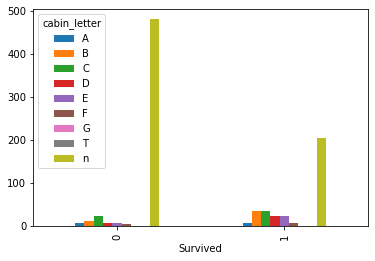

In [51]:
pd.pivot_table(titanic, index='Survived', columns='cabin_letter', values='Ticket',aggfunc='count').plot(kind='bar')

More survived from cabins with letters and less for those without letters (n).

--------------
# 3.Preparing Data
To prepare the data for the models we’ll need to…<br>
-drop 2 NaN values from Embarked <br>
-impute mean for age<br>
-encouding:'Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass' <br>
-target encouding: 'cabin_letter'<br>
-standardise:all <br>

In [53]:
#drop 2 NaN values from Embarked 
titanic.dropna(subset=['Embarked'], inplace=True)
#impute mean for age
titanic.Age = titanic.Age.fillna(titanic.Age.mean())

#OH Encouding:'Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass'
OH_features = ['Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass']
OH_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_enc.fit_transform(titanic[OH_features]))
OH_cols_train.index = titanic.index

titanic_drop = titanic.drop(OH_features, axis=1)

OH_titanic = pd.concat([titanic_drop, OH_cols_train], axis=1)

#lable encoder 'cabin_letter' not all the same letters appear in training and test sets
label_titanic = OH_titanic.copy()

label_encoder = LabelEncoder()
label_titanic['cabin_label'] = label_encoder.fit_transform(OH_titanic['cabin_letter'])

#standardise:all 
to_scale =[ 'Pclass', 'Age','SibSp','Parch','Fare',               0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,      'cabin_label']
scaler = StandardScaler()
titanic_scaled = label_titanic.copy()
titanic_scaled[to_scale] = scaler.fit_transform(titanic_scaled[to_scale])

--------------------
# 4. Model Building

### Predictions

| |            |   |
|---|---------------------------|--------------------|
| 1 | Naive Bayes               | 0.7728242239573415 |
| 2 | Decision Tree             | 0.7818320319939059 |
| 3 | Logistic Regression       | 0.8076620326287056 |
| 4 | KNeighborsClassifier      | 0.8155652891512727 |
| 5 | Random Forest             | 0.8076874246175333 |
| 6 | Support Vector Classifier | 0.8076683806259124 |
| 7 | Xtreme Gradient Boosting  | 0.8223005141877738 |

Logistic Regression, Random Forest, Support Vector Classifier, Xtreme Gradient Boosting seemed to do the best. 

In [55]:
y_train = titanic_scaled.Survived
features = ['Pclass', 'Age', 'SibSp','Parch','Fare',            0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,            'cabin_label']
X_train = titanic_scaled[features]

In [56]:
#1.Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
cv = cross_val_score(nb_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.76404494 0.75842697 0.74719101 0.78089888 0.81355932]
Cross val mean: 0.7728242239573415


In [57]:
#2.Decision Tree
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train,y_train)
cv = cross_val_score(tree_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.75280899 0.7752809  0.79775281 0.75280899 0.83050847]
Cross val mean: 0.7818320319939059


In [58]:
#3.Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
cv = cross_val_score(log_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.81460674 0.80337079 0.81460674 0.78651685 0.81920904]
Cross val mean: 0.8076620326287056


In [59]:
#4.KNeighborsClassifier 
KN_model = KNeighborsClassifier()
KN_model.fit(X_train,y_train)
cv = cross_val_score(KN_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.80337079 0.7752809  0.83707865 0.80898876 0.85310734]
Cross val mean: 0.8155652891512727


In [60]:
#5.Random Forest
ranfor_model = RandomForestClassifier(random_state=0)
ranfor_model.fit(X_train,y_train)
cv = cross_val_score(ranfor_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.76404494 0.79213483 0.84831461 0.79213483 0.84180791]
Cross val mean: 0.8076874246175333


In [61]:
#6.Support Vector Classifier
SVC_model = SVC(probability=True)
SVC_model.fit(X_train,y_train)
cv = cross_val_score(SVC_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.79213483 0.80337079 0.83146067 0.78651685 0.82485876]
Cross val mean: 0.8076683806259124


In [62]:
#7.Xtreme Gradient Boosting
XGB_model = XGBClassifier(random_state =0)
XGB_model.fit(X_train,y_train)
cv = cross_val_score(XGB_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.81460674 0.81460674 0.84269663 0.79213483 0.84745763]
Cross val mean: 0.8223005141877738


In [65]:
sorted(zip(XGB_model.feature_importances_, features), reverse=True)

[(0.44772357, 0),
 (0.1176988, 25),
 (0.08463766, &#39;Pclass&#39;),
 (0.050697204, &#39;cabin_label&#39;),
 (0.03690078, &#39;SibSp&#39;),
 (0.036283676, 2),
 (0.027601177, 10),
 (0.022037933, 3),
 (0.021650983, &#39;Age&#39;),
 (0.019510517, &#39;Fare&#39;),
 (0.019283304, 23),
 (0.018629145, 16),
 (0.014486605, 11),
 (0.014239702, 19),
 (0.013912284, 4),
 (0.012582168, 9),
 (0.011880442, 14),
 (0.011086339, &#39;Parch&#39;),
 (0.009139994, 7),
 (0.005251802, 6),
 (0.0047659767, 13),
 (0.0, 24),
 (0.0, 22),
 (0.0, 21),
 (0.0, 20),
 (0.0, 18),
 (0.0, 17),
 (0.0, 15),
 (0.0, 12),
 (0.0, 8),
 (0.0, 5),
 (0.0, 1)]

Some of these unimportant features could be dropped

------------
# 5.Tune Models<br>
|   |                           | Original           | Tuning             |
|---|---------------------------|--------------------|--------------------|
| 1 | Logistic Regression       | 0.8076620326287056 | 0.813305402145623  |
| 2 | Random Forest             | 0.8076874246175333 | 0.8256713007046276 |
| 3 | Support Vector Classifier | 0.8076683806259124 | 0.8155652891512728 |
| 4 | Xtreme Gradient Boosting  | 0.8223005141877738 | 0.8357900082523964 |

Tuning the models made improvements to them all. 

In [68]:
#1. Logistic Regression
log_model = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'], 'C': np.logspace(-4, 4, 20), }

Log_grid = GridSearchCV(log_model, param_grid, cv=5, verbose=True, return_train_score=True)

Log_grid.fit(X_train, y_train)

print (Log_grid.best_score_, Log_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
0.813305402145623 {&#39;C&#39;: 0.03359818286283781, &#39;penalty&#39;: &#39;l2&#39;}
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished


In [69]:
#2. Random Forest
rf_model = RandomForestClassifier(random_state=0,)

param_grid = { 'n_estimators': [150, 200, 300, 500],'criterion' :['gini'], 'max_features': ['auto'],'max_depth' : [3, 5, 10, 20],}


rf_rand = RandomizedSearchCV(rf_model, param_grid, n_iter=50, cv=5, verbose=True, return_train_score=True, n_jobs=-1)

rf_rand.fit(X_train, y_train)

print (rf_rand.best_score_, rf_rand.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   20.2s finished
0.8256713007046276 {&#39;n_estimators&#39;: 200, &#39;max_features&#39;: &#39;auto&#39;, &#39;max_depth&#39;: 10, &#39;criterion&#39;: &#39;gini&#39;}


In [70]:
#3. Support Vector Classifier 
SVC_model = SVC()
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

SVC_model = SVC(probability=True)
SVC_grid = GridSearchCV(SVC_model, param_grid, cv=5, verbose=True, return_train_score=True, n_jobs=-1)

SVC_grid.fit(X_train, y_train)

print (SVC_grid.best_score_, SVC_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
0.8155652891512728 {&#39;C&#39;: 1, &#39;gamma&#39;: 0.1}
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.5s finished


In [71]:
#4. Xtreme Gradient Boosting
XGB_model = XGBClassifier(random_state =0)
param_grid = {'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5],
                'subsample': [0.6, 0.8, 1.0],'colsample_bytree': [0.6, 0.8, 1.0],
                'max_depth': [3, 4, 5]}

XGB_rand = RandomizedSearchCV(XGB_model, param_grid, n_iter=50, cv=5, verbose=True, return_train_score=True, n_jobs=-1)

XGB_rand.fit(X_train, y_train)

print (XGB_rand.best_score_, XGB_rand.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    7.8s finished
0.8357900082523964 {&#39;subsample&#39;: 0.6, &#39;min_child_weight&#39;: 1, &#39;max_depth&#39;: 4, &#39;gamma&#39;: 2, &#39;colsample_bytree&#39;: 1.0}


--------------------
# 6. Combining Models in Ensembles
|   |                        |                    |
|---|------------------------|--------------------|
| 1 | Hard Voting Classifier | 0.8290484352186885 |
| 2 | Soft Voting Classifier | 0.824535009204596  |
| 3 | Stacking Classifier    | 0.8268075922046594 |
Each ensemble seems to perform almost identically. It will interesting to see how they perform in the final submissions.

In [72]:
log_best = Log_grid.best_estimator_
rf_best = rf_rand.best_estimator_
SVC_best = SVC_grid.best_estimator_
XGB_best = XGB_rand.best_estimator_

estimators = [('log_best', log_best),
              ('rf_best', rf_best),  
              ('SVC_best', SVC_best),
              ('XGB_best', XGB_best), 
              ]

In [73]:
vote_hard = VotingClassifier(estimators, verbose=True, n_jobs=-1, voting='hard')

vote_hard.fit(X_train,y_train)
cv = cross_val_score(vote_hard, X_train, y_train,cv=5 )
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.80898876 0.83146067 0.86516854 0.78651685 0.85310734]
Cross val mean: 0.8290484352186885


In [74]:
vote_soft = VotingClassifier(estimators, verbose=True, n_jobs=-1, voting='soft')

vote_soft.fit(X_train,y_train)
cv = cross_val_score(vote_soft, X_train, y_train,cv=5 )
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.81460674 0.8258427  0.84269663 0.80337079 0.83615819]
Cross val mean: 0.824535009204596


In [75]:
stack = StackingClassifier(estimators, verbose=True, n_jobs=-1,)

stack.fit(X_train,y_train)
cv = cross_val_score(stack, X_train, y_train,cv=5 )
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.80337079 0.82022472 0.84831461 0.80337079 0.85875706]
Cross val mean: 0.8268075922046594


0.8205801992928319


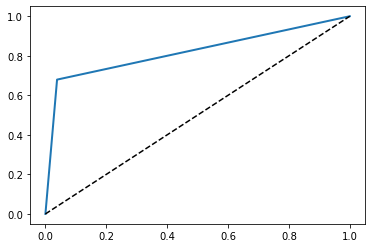

In [76]:
predictions_hard = vote_hard.predict(X_train)
print (roc_auc_score(y_train, predictions_hard))
fpr, tpr, thresholds = roc_curve(y_train, predictions_hard)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 

plot_roc_curve(fpr, tpr)
plt.show()

There is still clearly some room for improvement here. 

--------------------------
# 7. Test Model
|   |                        | Final Test Score |
|---|------------------------|------------------|
| 1 | Hard Voting Classifier | 0.79186          |
| 2 | Soft Voting Classifier | 0.78229          |
| 3 | Stacking Classifier    | 0.76555          |

The hard voting classifier and was top 10% on Kaggle leader board.  

### a. Build Test Set 

In [77]:
titanic_test = pd.read_csv('test.csv')
titanic_test['Sex_Embarked'] = titanic_test.Sex + '_' + titanic_test.Embarked
titanic_test['str_Pclass'] = titanic_test.Pclass.apply(lambda x: str(x))
titanic_test['Pclass_sex'] = titanic_test['str_Pclass'] + '_' + titanic_test['Sex']
titanic_test['Embarked_Pclass'] = titanic_test['Embarked'] + '_' + titanic_test['str_Pclass']
titanic_test['cabin_letter'] = titanic_test.Cabin.apply(lambda x: str(x)[0])
titanic_test.dropna(subset=['Embarked'], inplace=True)
titanic_test.Age = titanic_test.Age.fillna(titanic_test.Age.mean())
#one hot encoding
OH_features = ['Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass']
OH_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_test = pd.DataFrame(OH_enc.fit_transform(titanic_test[OH_features]))
OH_cols_test.index = titanic_test.index

titanic__test_drop = titanic_test.drop(OH_features, axis=1)

OH_titanic_test = pd.concat([titanic__test_drop, OH_cols_test], axis=1)
#lable encoding 
label_titanic_test = OH_titanic_test.copy()

label_titanic_test['cabin_label'] = label_encoder.transform(OH_titanic_test['cabin_letter'])
#scaling 
to_scale =[ 'Pclass', 'Age','SibSp','Parch','Fare',               0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,      'cabin_label']
titanic_scaled_test = label_titanic_test.copy()
titanic_scaled_test[to_scale] = scaler.transform(label_titanic_test[to_scale])
#select features
features = ['Pclass', 'Age', 'SibSp','Parch','Fare',            0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,            'cabin_label']
X_test = titanic_scaled_test[features]
#one na value needs filling 
X_test.Fare.fillna(method='bfill', inplace=True)

### b. Run Tests and Make Submissions 

In [79]:
#hard voting submission 
predictions_hard = vote_hard.predict(X_test)
sub_hard = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions_hard})
sub_hard.to_csv('hard_submission.csv', index=False)
print ('hard_submission.csv saved')

#soft voting submission 
predictions_soft = vote_soft.predict(X_test)
sub_soft = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions_soft})
sub_soft.to_csv('soft_submission.csv', index=False)
print ('soft_submission.csv saved')

#stacking submission 
predictions_stack = stack.predict(X_test)
sub_stack = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions_stack})
sub_stack.to_csv('stack_submission.csv', index=False)
print ('stack_submission.csv saved')

hard_submission.csv saved
soft_submission.csv saved
stack_submission.csv saved
